In [1]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import pandas
import math

import sys
import os
sys.path.insert(0, os.getcwd().rsplit('/',1)[0])

import loops_utils
from loops_utils import LoopChromosomeContainer

In [2]:
%matplotlib inline

In [3]:
resolution = 10 ** 4

###### Read loops coordinates, sizes and etc

In [4]:
loops_info = pandas.read_csv('GSE63525_GM12878_primary+replicate_HiCCUPS_looplist.txt', sep='\t',
                             dtype = {'x1': np.long, 'x2': np.long, 'y1': np.long, 'y2': np.long})
loops_info[['x1', 'x2', 'y1', 'y2', 'x', 'y']] = loops_info[['x1', 'x2', 'y1', 'y2', 'centroid1', 'centroid2']].apply(
    lambda x : (x / resolution).astype('int64')
)

In [5]:
def get_container(chr):
    loops_info_chr = loops_info[loops_info.chr1 == str(chr)]
    return LoopChromosomeContainer(np.load('arrs/10kb_chr' + str(chr) + '.npy'), loops_info_chr)

# Scaling

## loops

In [6]:
container1 = get_container(1)

###### mean

/Users/alex/Desktop/ws/hse/diploma/loops/loops_utils.py:394: RuntimeWarning: Mean of empty slice
  scaling[i] = np.nanmean(np.diagonal(arr, i))
/Users/alex/Desktop/ws/hse/diploma/loops/loops_utils.py:418: RuntimeWarning: divide by zero encountered in log
  plt.plot(np.log(range(scaling.shape[0])), np.log(scaling), 'b')


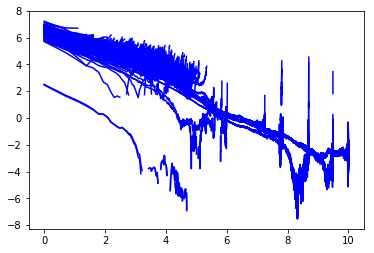

In [7]:
loops_utils.plot_scaling_values(container1.get_mean_scaling_values())

###### sum

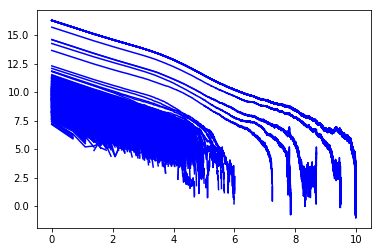

In [8]:
loops_utils.plot_scaling_values(container1.get_sum_scaling_values())

## Loops plus area after

substract loops with sizes before 96-percentiles

In [9]:
np.percentile(loops_info.y - loops_info.x, 96)

130.0

In [10]:
loops_info = loops_info[(loops_info.y - loops_info.x) < np.percentile(loops_info.y - loops_info.x, 96)]

In [11]:
max_loop_size = int(np.max(loops_info['y1'] - loops_info['x1']))
max_loop_size

130

single

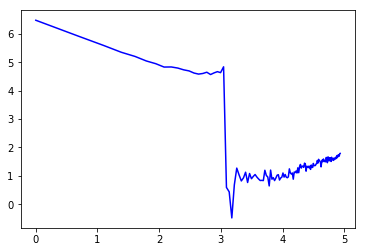

In [12]:
container1 = get_container(1)
value = container1.calc_scaling_loop_plus_add_mean(loops_info[loops_info.chr1 == '1'].first_valid_index(), max_loop_size)
loops_utils.plot_scaling_values([value], name='rao_loop_single')

all

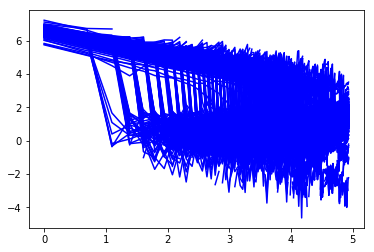

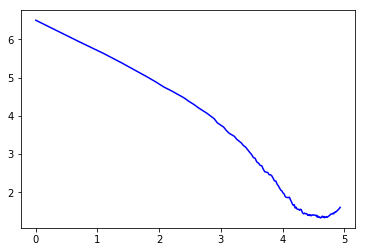

In [13]:
scaling_values1, mean1 = container1.get_mean_scaling_values_plus_area(max_loop_size)
loops_utils.plot_scaling_values(scaling_values1, name='rao_chr1')
loops_utils.plot_scaling_values([mean1], name='rao_loop_mean_chr1')

#### overall chromosomes

In [14]:
overall_scaling_values = scaling_values1
for chr in [2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,'X']:
    scaling_values_chr, _ = get_container(chr).get_mean_scaling_values_plus_area(max_loop_size)
    overall_scaling_values = overall_scaling_values + scaling_values_chr

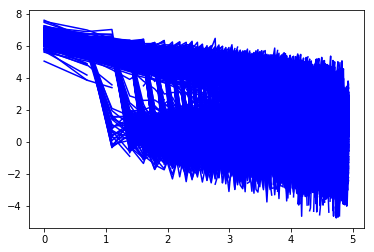

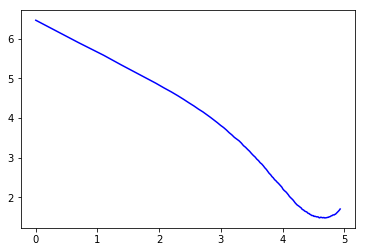

In [15]:
loops_utils.plot_scaling_values(overall_scaling_values, name='rao_overall')
loop_mean = np.nanmean(overall_scaling_values, axis=0)
loops_utils.plot_scaling_values([loop_mean], name='rao_loop_mean_overall')

## interloops

###### mean

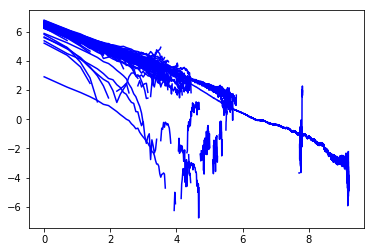

In [16]:
scaling_values = container1.get_interloops_mean_scaling_values()
loops_utils.plot_scaling_values(scaling_values)

###### sum

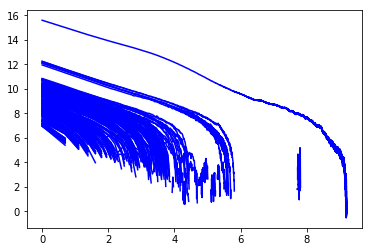

In [17]:
scaling_values = container1.get_interloops_sum_scaling_values()
loops_utils.plot_scaling_values(scaling_values)

## Plus area after

In [18]:
area_size = 200

all

In [19]:
overall_interloop_scaling = []
for chr in [1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,'X']:
    scaling_values_chr, _ = get_container(chr).get_interloops_mean_scaling_values_plus_area(area_size)
    overall_interloop_scaling = overall_interloop_scaling + scaling_values_chr

mean

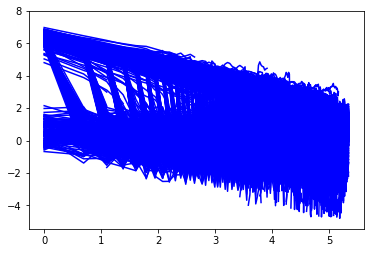

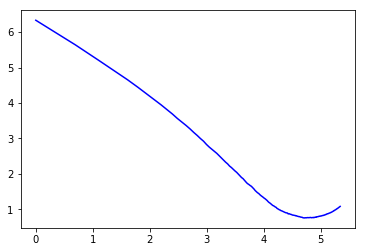

In [20]:
interloop_mean = np.nanmean(overall_interloop_scaling, axis=0)
loops_utils.plot_scaling_values(overall_interloop_scaling, name='rao_interloop')
loops_utils.plot_scaling_values([interloop_mean], name='rao_interloop_mean')

/anaconda3/envs/loops/lib/python3.7/site-packages/ipykernel_launcher.py:1: RuntimeWarning: divide by zero encountered in log
  """Entry point for launching an IPython kernel.
/anaconda3/envs/loops/lib/python3.7/site-packages/ipykernel_launcher.py:2: RuntimeWarning: divide by zero encountered in log
  


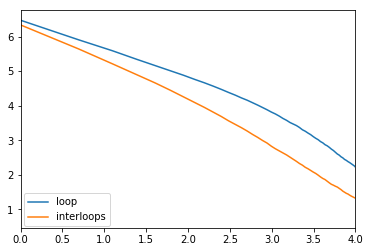

In [21]:
plt.plot(np.log(range(len(loop_mean))), np.log(loop_mean), label='loop')
plt.plot(np.log(range(len(interloop_mean))), np.log(interloop_mean), label='interloops')
plt.xlim(0, 4)
plt.legend(bbox_to_anchor=(0.01, 0.16), loc=2, borderaxespad=0.)
plt.savefig('pictures/scaling/rao_avg_scaling.png')

/anaconda3/envs/loops/lib/python3.7/site-packages/ipykernel_launcher.py:1: RuntimeWarning: divide by zero encountered in log
  """Entry point for launching an IPython kernel.
/anaconda3/envs/loops/lib/python3.7/site-packages/ipykernel_launcher.py:2: RuntimeWarning: divide by zero encountered in log
  


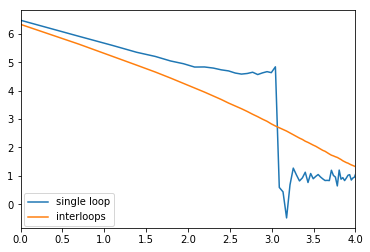

In [22]:
plt.plot(np.log(range(len(value))), np.log(value), label='single loop');
plt.plot(np.log(range(len(interloop_mean))), np.log(interloop_mean), label='interloops')
plt.xlim(0, 4)
plt.legend(bbox_to_anchor=(0.01, 0.16), loc=2, borderaxespad=0.)
plt.savefig('pictures/scaling/rao_avg_vs_one_scaling.png')

## Scaling in one size

In [ ]:
scaling_values = []

width , height = loop_new_size, loop_new_size
resize_image_sum = np.zeros(shape=(width,height))

for idx, row in loops.iterrows():
    x1, x2, y1, y2 = row[['x1', 'x2', 'y1', 'y2']]
    
    original_image = arr[x1:y1, x2:y2]
    resized_image = loops_utils.resize_image_arr(original_image, width, height)
    loop = resized_image
    
    scaling = loops_utils.calc_scaling_mean(loop)
    scaling_values.append(scaling)
    
loops_utils.plot_scaling_values(scaling_values)

In [ ]:
fig = plt.figure()
ax = plt.axes()

sum_scaling = scaling_values[0]

for scaling in scaling_values:
    sum_scaling = sum_scaling + scaling
    
mean_scaling = sum_scaling / len(scaling_values)

plt.plot(np.log(range(mean_scaling.shape[0])), np.log(mean_scaling), 'b');
plt.show()

In [ ]:
scaling_values = []

width , height = loop_new_size, loop_new_size
resize_image_sum = np.zeros(shape=(width,height))

for idx, row in loops.iterrows():
    x1, x2, y1, y2 = row[['x1', 'x2', 'y1', 'y2']]
    
    original_image = arr[x1:y1, x2:y2]
    scaling = loops_utils.calc_scaling_sum(loops_utils.resize_image_arr(original_image, width, height))
    scaling_values.append(scaling)
    
loops_utils.plot_scaling_values(scaling_values)

In [ ]:
fig = plt.figure()
ax = plt.axes()

sum_scaling = scaling_values[0]

for scaling in scaling_values:
    sum_scaling = sum_scaling + scaling
    
mean_scaling = sum_scaling / len(scaling_values)

plt.plot(np.log(range(mean_scaling.shape[0])), np.log(mean_scaling), 'b');
plt.show()

### interloops

In [ ]:
scaling_values = []
        
x_begin = 0
y_begin = 0

width , height = loop_new_size, loop_new_size
resize_image_sum = np.zeros(shape=(width,height))

for idx, row in loops.iterrows():
    x1, x2, y1, y2 = row[['x1', 'x2', 'y1', 'y2']]
    
    if x_begin < x1 and y_begin < y1:        
        original_image = arr[x_begin:x1, y_begin:y1]
        resized_image = loops_utils.resize_image_arr(original_image, width, height)

        x_begin = x2
        y_begin = y2

        scaling = loops_utils.calc_scaling_mean(resized_image)
        scaling_values.append(scaling)
        
loops_utils.plot_scaling_values(scaling_values)

In [ ]:
fig = plt.figure()
ax = plt.axes()

sum_scaling = scaling_values[0]

for scaling in scaling_values:
    sum_scaling = sum_scaling + scaling
    
mean_scaling = sum_scaling / len(scaling_values)

plt.plot(np.log(range(mean_scaling.shape[0])), np.log(mean_scaling), 'b');
plt.show()

In [ ]:
scaling_values = []
        
x_begin = 0
y_begin = 0

width , height = loop_new_size, loop_new_size
resize_image_sum = np.zeros(shape=(width,height))

for idx, row in loops.iterrows():
    x1, x2, y1, y2 = row[['x1', 'x2', 'y1', 'y2']]
    
    if x_begin < x1 and y_begin < y1:        
        original_image = arr[x_begin:x1, y_begin:y1]
        resized_image = loops_utils.resize_image_arr(original_image, width, height)
    
        x_begin = x2
        y_begin = y2

        scaling = loops_utils.calc_scaling_sum(resized_image)
        scaling_values.append(scaling)
        
loops_utils.plot_scaling_values(scaling_values)

In [ ]:
fig = plt.figure()
ax = plt.axes()

sum_scaling = scaling_values[0]

for scaling in scaling_values:
    sum_scaling = sum_scaling + scaling
    
mean_scaling = sum_scaling / len(scaling_values)

plt.plot(np.log(range(mean_scaling.shape[0])), np.log(mean_scaling), 'b');
plt.show()